In [1]:
import pandas as pd
import numpy as np
import calendar

# Data reorganization

In [2]:
data = pd.read_pickle('data/merged.pickle')
data.columns

Index(['session_id', 'time', 'user_id', 'product_id', 'event', 'discount',
       'purchase_id', 'made_purchase', 'known_product', 'product', 'price',
       'cat_0', 'cat_1', 'cat_2', 'cat_3', 'city', 'street', 'name_1',
       'name_2', 'surname', 'female', 'purchase_time', 'delivery_time',
       'delivery_company', 'delivery_duration', 'duration',
       'syntetic_duration', 'agg_time_spent'],
      dtype='object')

In [27]:
data.head()

,session_id,time,user_id,product_id,event,discount,purchase_id,made_purchase,known_product,product,...,name_2,surname,female,purchase_time,delivery_time,delivery_company,delivery_duration,duration,syntetic_duration,agg_time_spent
0,100001.0,2020-01-17 16:08:57,102.0,1001.0,VIEW_PRODUCT,0,NaN,False,True,Telefon Siemens Gigaset DA310,...,NaN,Męcik,False,NaT,NaT,NaN,NaT,00:02:43.251191,True,00:08:06.502383
1,100002.0,2020-01-07 05:10:41,102.0,1277.0,VIEW_PRODUCT,20,NaN,False,True,Apple iPad mini 64GB 4G,...,NaN,Męcik,False,NaT,NaT,NaN,NaT,00:03:45,False,00:05:23.251191
2,100002.0,2020-01-07 05:14:26,102.0,1276.0,VIEW_PRODUCT,20,NaN,False,True,Apple iPad mini 64GB,...,NaN,Męcik,False,NaT,NaT,NaN,NaT,00:02:43.251191,True,00:03:45
3,100003.0,2020-01-16 09:37:42,102.0,1276.0,VIEW_PRODUCT,0,NaN,False,True,Apple iPad mini 64GB,...,NaN,Męcik,False,NaT,NaT,NaN,NaT,00:00:40,False,00:06:28.251191
4,100003.0,2020-01-16 09:38:22,102.0,1277.0,VIEW_PRODUCT,0,NaN,False,True,Apple iPad mini 64GB 4G,...,NaN,Męcik,False,NaT,NaT,NaN,NaT,00:02:43.251191,True,00:09:08.251191


# Distribution analysis

## Time

### Daily activity

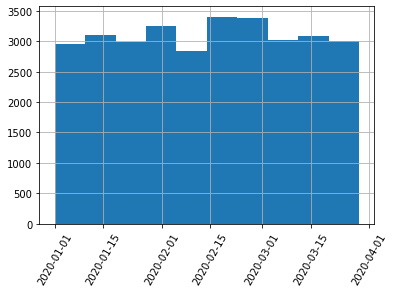

In [4]:
data.time.apply(lambda t: t.replace(hour=0, minute=0, second=0)).hist(xrot=60)

### Daily purchases

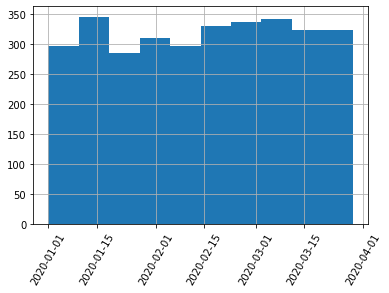

In [5]:
data[data.made_purchase].time.apply(lambda t: t.replace(hour=0, minute=0, second=0)).hist(xrot=60)

### Hourly activity

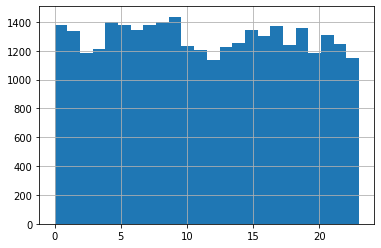

In [6]:
data.time.apply(lambda t: t.hour).hist(bins=24)

### Hourly purchases

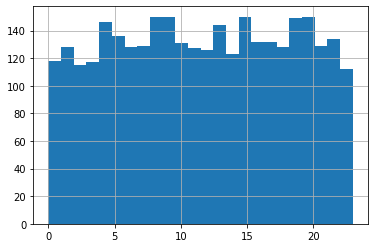

In [7]:
data[data.made_purchase].time.apply(lambda t: t.hour).hist(bins=24)

### Weekday activity (starting from Monday)

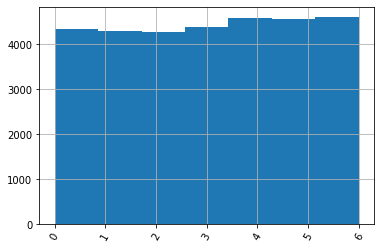

In [8]:
data.time.apply(lambda t: t.weekday()).hist(xrot=60, bins=7)

### Weekday purchases (starting from Monday)

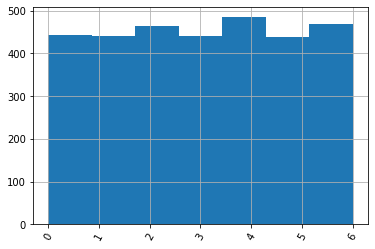

In [9]:
data[data.made_purchase].time.apply(lambda t: t.weekday()).hist(xrot=60, bins=7)

# Event

## Type

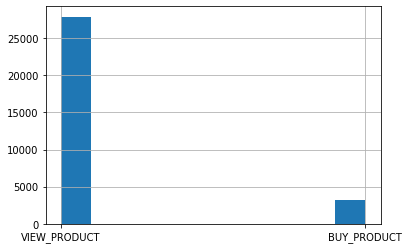

In [10]:
data.event.hist()

In [11]:
data.event.value_counts()

VIEW_PRODUCT    27839
BUY_PRODUCT      3184
Name: event, dtype: int64

## Time

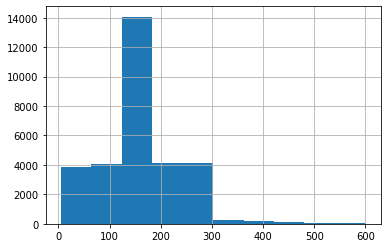

In [13]:
data.duration.apply(lambda t: t.total_seconds()).hist()

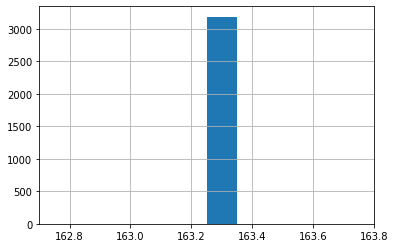

In [14]:
data[data.made_purchase].duration.apply(lambda t: t.total_seconds()).hist()

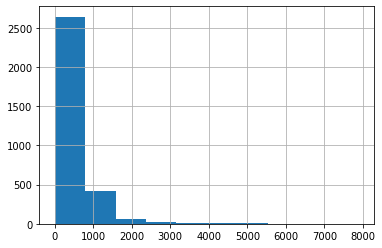

In [16]:
data[data.made_purchase].agg_time_spent.apply(lambda t: t.total_seconds()).hist()

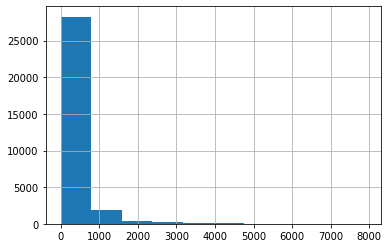

In [17]:
data.agg_time_spent.apply(lambda t: t.total_seconds()).hist()

# Product

## Main category of purchased products

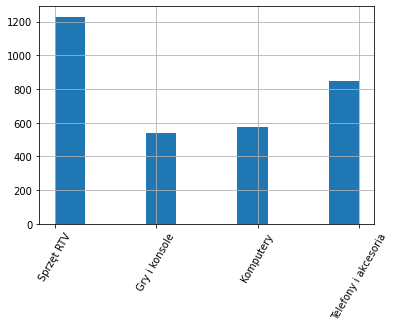

In [18]:
data[data.made_purchase].cat_0.hist(xrot=60)

## Secondary categories of purchased products

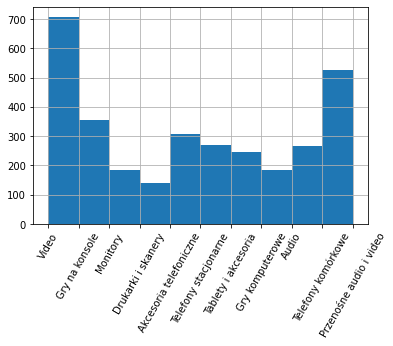

In [19]:
data[data.made_purchase].cat_1.hist(xrot=60)

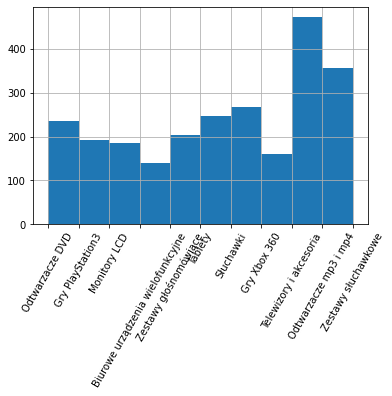

In [20]:
data[data.made_purchase].cat_2.hist(xrot=60)

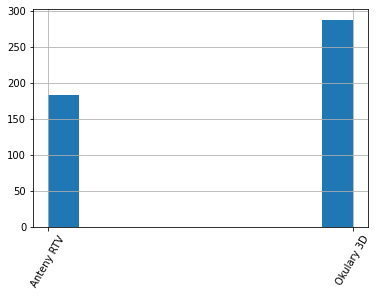

In [21]:
data[data.made_purchase].cat_3.hist(xrot=60)

## Price

### Purchased products

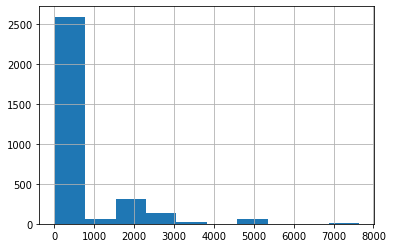

In [22]:
data[data.made_purchase].price.hist()

### All products

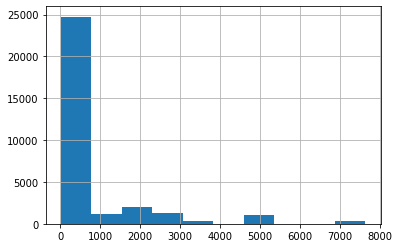

In [23]:
data.price.hist()

# User

## Male or female

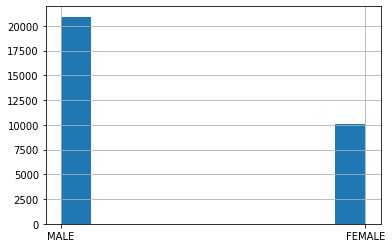

In [24]:
data.female.apply(lambda is_female: 'FEMALE' if is_female else 'MALE').hist()

## City

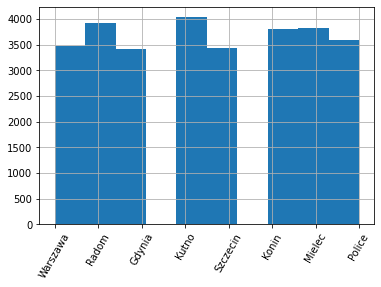

In [25]:
data.city.hist(xrot=60)

In [26]:
data.city.value_counts()

Kutno       4034
Radom       3918
Mielec      3820
Konin       3808
Police      3588
Warszawa    3479
Szczecin    3439
Gdynia      3408
Name: city, dtype: int64